<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/0615_%EB%94%A5%EB%9F%AC%EB%8B%9D%EB%AA%A8%EB%8D%B8%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손실함수
- 모델 훈련되는 동안 최소화해야 하고자 하는 함수
## keras 손실함수
- sparse_categorical_crossentropy: class가 배타적 방식으로 구분, 즉 정수형으로 구분
- categorical_cross_entropy: 클래스가 원-핫 인코딩(0 or 1)
- binary_cross_entropy: 이진분류
## 평균절대 오차(Mean Abdolute_Error, MAE)
- 오차가 커져도 손실함수가 일정하게 증가
- outlier에 Robust(강건한) 특성
- outlier에 해당하는 지점에서 손실함수의 최소값으로 가는 정도의 영향력이 크지 않은 특성
- Regression에 많이 사용하는 손실함수
## 평균제곱오차(Mean Squared Error, MSE)
- 가장 많이 사용하는 손실함수
- 오차가 커질수록 손실함수가 빠르게 증가
- 정답과 예측한 값의 차이가 클수록 더 많은 패널치
- Regression에 사용
## One-Hot Encoding
- 범주형 변수를 표현할 때 사용
- Dummy Variable(가변수)라고도 한다.
- 정답 1, 나머지 0
## Cross Entropy Error, CEE
- Binary Classification(이진분류) 또는 Multi Class Classification(다중 클래스 분류)에 주로 사용
- 오차는 softmax 결과와 one-hot encoding 사이에 출력 간 거리를 비교
- 정답을 맞추면 오차가 0, 틀리면 차이가 클수록 오차가 무한히 커진다.


# Optimizer와 지표
- Optimizer는 손실함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정
- keras.optimizerSGD(): 기본적인 확률 경사 하강법
- keras.Optimizer.Adam(): 자주 사용되는 Optimizer
## Gradient Decent(경사하강법)
- 미분과 기울기로 동작하며, 스칼라를 벡터로 미분
- 변화가 없는 지점은 미분값이 0, 미분값이 클수록 변화량이 크다.
- 한 스텝마다의 미분값에 따라 이동하는 방향을 결정, f(x)값이 변하지 않을때까지 반복
- 한 스텝이 learning rate(학습률)
## Convex Function, Non-Convex Function
- Convex Function(볼록함수)는 어떤 지점에서 시작해도 최적값 도달 가능
- Non-Convex Function는 시작점에 따라 다른 최적값에 도달할 수 있다.
## Saddle Point(안장점)
- 기울기가 0이지만 극값이 되지 않는 안장점이 존재
- 경사하강법은 안장점에서 벗어나지 못하는 문제
## Learning rate(학습률)
- 학습률이 너무 크면 overshooting(발산)하고, 너무 작으면 최적점에 도달하지 목할 수 있다.
## Metrics(지표)
- 일반적으로 MAE, ACC(Accuracy) 사용

# 딥러닝 모델 학습

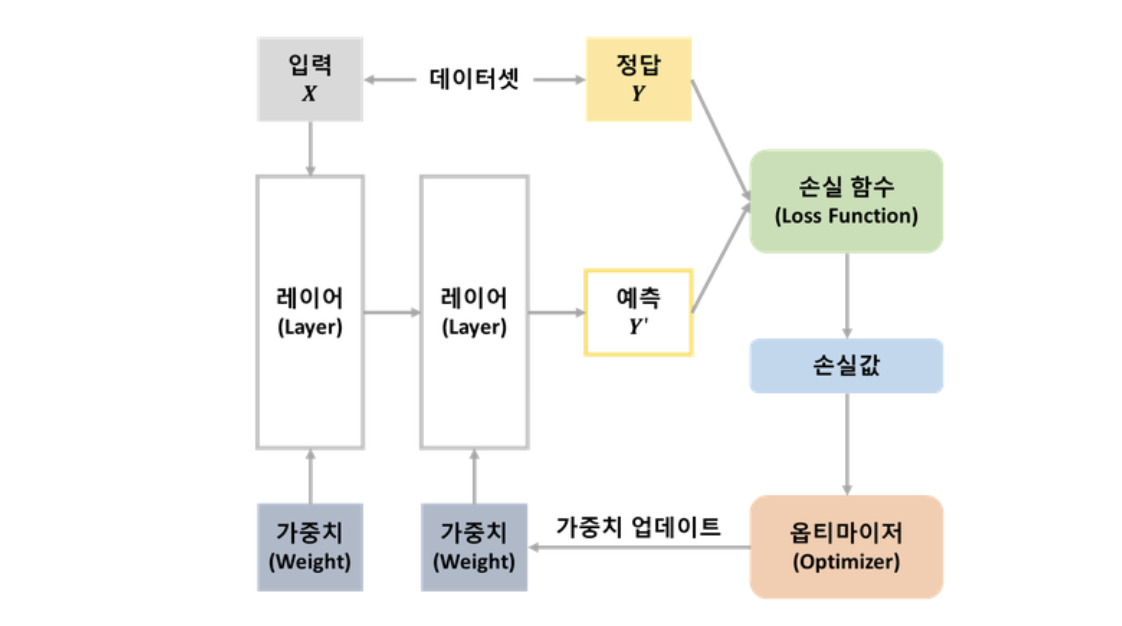

## 데이터 생성
- 선형회귀(Linear Regression)를 위한 딥러닝 모델
- make_regression 함수를 이용하여 입력 X와 정답 y로 샘플 갯수(n_samples) 200개, 특징 갯수(n_featrues) 1개에 바이어스(bias)는 5.0, 노이즈(noise)는 5.0으로 지정하고, random_state는 123으로 하여 랜덤 시드를 지정

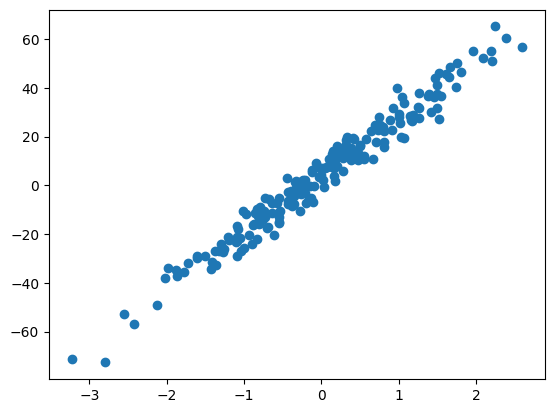

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1,
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


## 모델 생성


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

- 모델은 간단하게 Sequential()을 이용해 선언하고, Dense 레이어 하나를 추가해줍니다. 레이어의 유닛수는 1개이고, activation은 선형 회귀이니 'linear'로 지정하며, input_shape은 (1,) 으로 1차원 모양으로 입력 모양을 가집니다. 최종 모델의 구조를 summary() 함수를 통해 확인


In [4]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

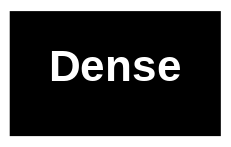

In [5]:
utils.plot_model(model)

## 모델 학습
- 옵티마이저(optimizer)로 SGD(Stochastic Gradient Descent) 를 사용
- compile() 함수를 통해서 손실 함수(loss function), 옵티마이저(optimizer), 지표(metrics)를 지정
- 손실 함수로 mse를 지정하여 Mean Square Error를 사용하고, 옵티마이저는 정의했던 SGD를 사용
- 모델 학습을 진행하기위해 fit() 함수를 호출합니다. 학습을 위해 x_train과 y_train를 지정하고, 학습 반복 횟수인 epochs를 40으로 지정

In [6]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 623.0012 - mae: 20.0851 - mse: 623.0012 
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 455.9674 - mae: 17.1639 - mse: 455.9674 
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 382.8801 - mae: 15.4211 - mse: 382.8801
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 319.8045 - mae: 14.4021 - mse: 319.8045
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 263.8072 - mae: 13.2704 - mse: 263.8072
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 197.6167 - mae: 11.5274 - mse: 197.6167
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 147.4462 - mae: 9.9262 - mse: 147.4462
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 110.1315 - mae: 8.2410 - mse: 110.1315
Epoch 9/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 106.0390 - mae: 8.2472 - mse: 106.0390
Epoch 10/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 80.7224 - mae: 7.2001 - mse: 80.7224
Epoch 11/40
5/5 ━━━━━━━━━━━━━━━━━━

- 모델이 학습하면서 각 epoch 마다 저장한 mae와 mse 지표를 차트를 통해서 확인

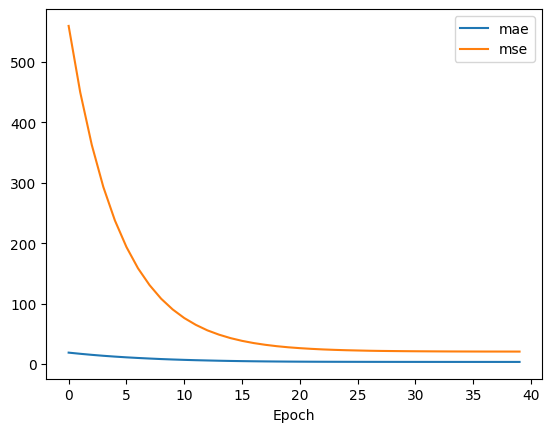

In [7]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

## 모델 평가
- evaluate() 함수를 이용하여 데이터셋인 x_test, y_test에 대해서 지표인 mae와 mse를 확인

In [8]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 21.7637 - mae: 3.9637 - mse: 21.7637 


[21.923080444335938, 3.98882794380188, 21.923080444335938]

## 모델 예측
- 학습된 모델을 통해 입력 데이터 X에 대한 예측값을 predict()를 통해 결과로 받아옵니다. 실제 데이터의 결과값
y와 모델의 예측 결과인 result를 살펴본다.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


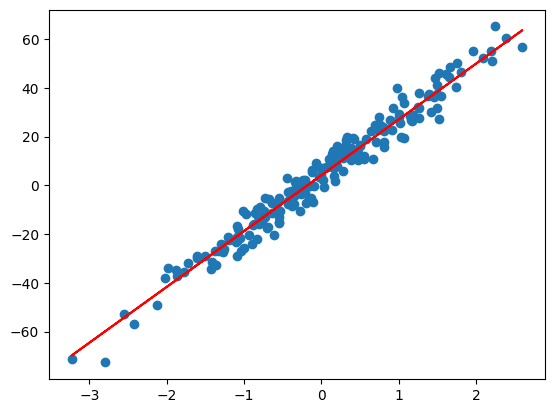

In [9]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

- 딥러닝 모델에서 사용한 레이어를 layers로 접근하여 살펴볼 수 있습니다. 여기에서는 Dense 레이어 하나만 사용된 것을 알 수 있다.

In [10]:
model.layers

[<Dense name=dense, built=True>]

- 모델의 0번째 레이어인 layers[0]를 가져와서 layer.name으로 레이어의 이름을 확인할 수 있다. 또한, get_layer() 함수를 통해 같은 이름의 레이어를 얻을 수도 있다.

In [11]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


- 레이어에서 사용하는 가중치(weights)와 바이어스(biases)를 get_weights() 함수를 통해서 얻을 수 있다. 즉, 레이어에 있는 가중치와 바이어스를 통해 선형 회귀식을 얻을 수 있다.

In [12]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.90646]]
[4.1711497]


- 딥러닝 모델에서 학습된 가중치(weights)와 바이어스(biases)를 통해 선형회귀식을 np.array(weights * X + biases)로 표현할 수 있다.

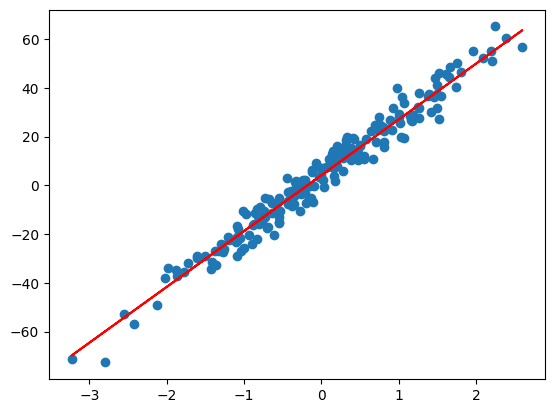

In [13]:
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()